In [35]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

In [36]:
tickers_1 = ['GOOGL', 'AAPL', 'AMZN', 'NVDA', 'BTC-USD', '^IXIC', 'AKBNK.IS', 'TUPRS.IS', '^SPX', 'GS', 'JPM', 'MSFT']
ticker2 = ['XU100.IS']
us_stocks = ['GOOGL', 'AAPL', 'AMZN', 'NVDA']
tr_stocks = ['AKBNK.IS', 'TUPRS.IS']

In [37]:
data = yf.download(tickers_1, start='2017-01-01')
data = data.loc[:, 'Adj Close']

xu100 = yf.download(ticker2, start='2021-01-01')['Adj Close'].to_frame(name = 'XU100.IS')
xu100 = xu100.asfreq('D')
xu100.index = pd.to_datetime(xu100.index).tz_localize('UTC')

dates = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
data = data.reindex(dates)
xu100 = xu100.reindex(dates)

data = pd.concat([data, xu100], axis=1)


[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  1 of 1 completed


# --> Starting the turkish data from 2021 due to problems in past data
# 



In [38]:
daily_data = data
weeekly_data = data.resample('W').last()
monthly_data = data.resample('ME').last()
yearly_data = data.resample('YE').last()

In [39]:
daily_returns = daily_data.pct_change(fill_method=None)
weekly_returns = weeekly_data.pct_change(fill_method=None)
monthly_returns = monthly_data.pct_change(fill_method=None)
yearly_returns = yearly_data.pct_change(fill_method=None)


# --> Resampling and calculating the returns.
#

#
# Plotting the time series data of stock prices and returns:

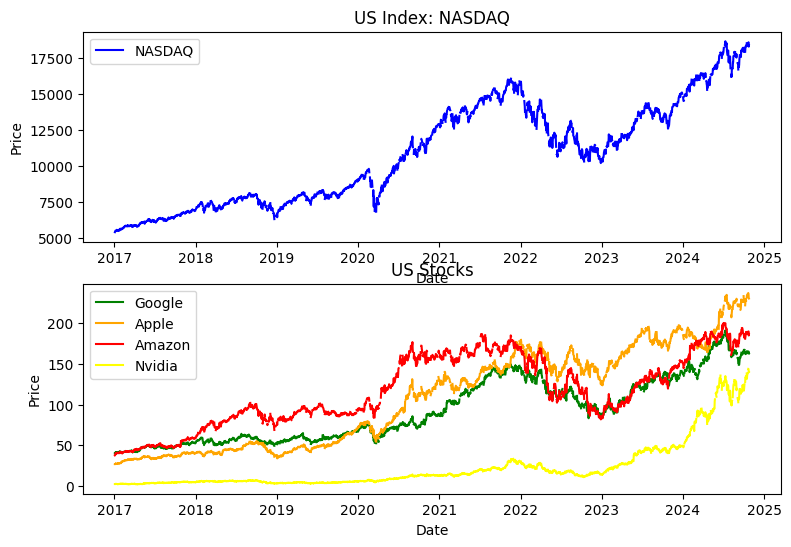

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(9,6)) 
ax[0].plot(daily_data['^IXIC'], label='NASDAQ', color='blue')
ax[0].set_title('US Index: NASDAQ')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()

# Plot US Stocks
ax[1].plot(daily_data['GOOGL'], label='Google', color='green')
ax[1].plot(daily_data['AAPL'], label='Apple', color='orange')
ax[1].plot(daily_data['AMZN'], label='Amazon', color='red')
ax[1].plot(daily_data['NVDA'], label='Nvidia', color='yellow')
ax[1].set_title('US Stocks')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[1].legend();

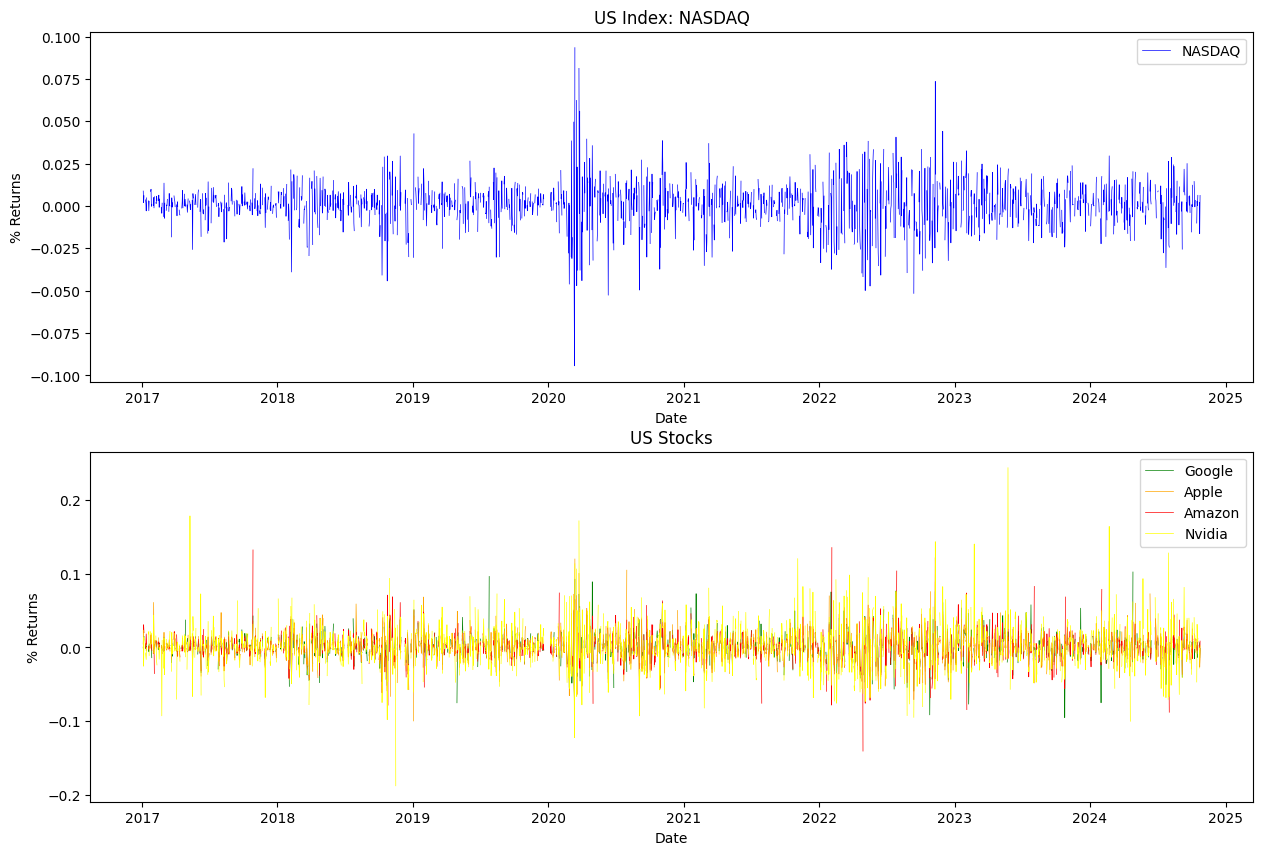

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(15,10)) 
ax[0].plot(daily_returns['^IXIC'], label='NASDAQ', linewidth=0.5, color='blue')
ax[0].set_title('US Index: NASDAQ')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('% Returns')
ax[0].legend()

# Plot US Stocks
ax[1].plot(daily_returns['GOOGL'], label='Google', linewidth=0.5, color='green')
ax[1].plot(daily_returns['AAPL'], label='Apple', linewidth=0.5, color='orange')
ax[1].plot(daily_returns['AMZN'], label='Amazon', linewidth=0.5, color='red')
ax[1].plot(daily_returns['NVDA'], label='Nvidia', linewidth=0.5, color='yellow')
ax[1].set_title('US Stocks')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('% Returns')
ax[1].legend();

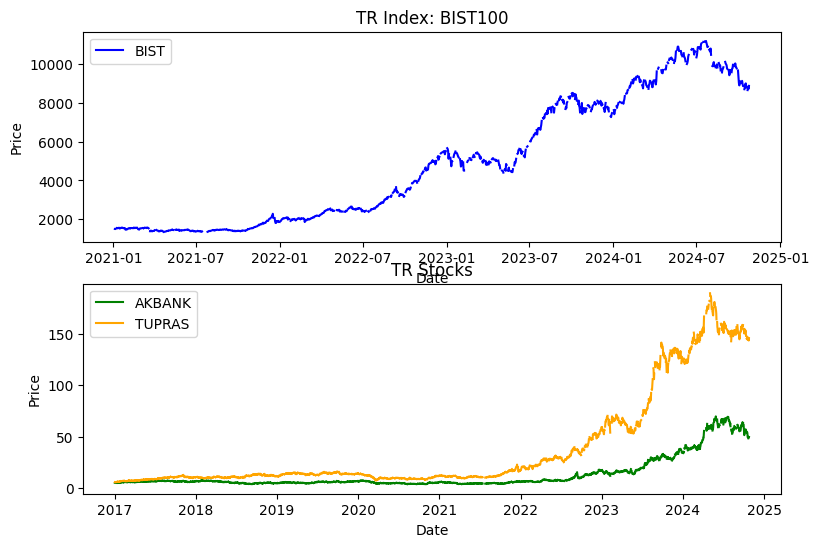

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(9,6)) 
ax[0].plot(daily_data['XU100.IS'], label='BIST', color='blue')
ax[0].set_title('TR Index: BIST100')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()

ax[1].plot(daily_data['AKBNK.IS'], label='AKBANK', color='green')
ax[1].plot(daily_data['TUPRS.IS'], label='TUPRAS', color='orange')
ax[1].set_title('TR Stocks')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[1].legend();

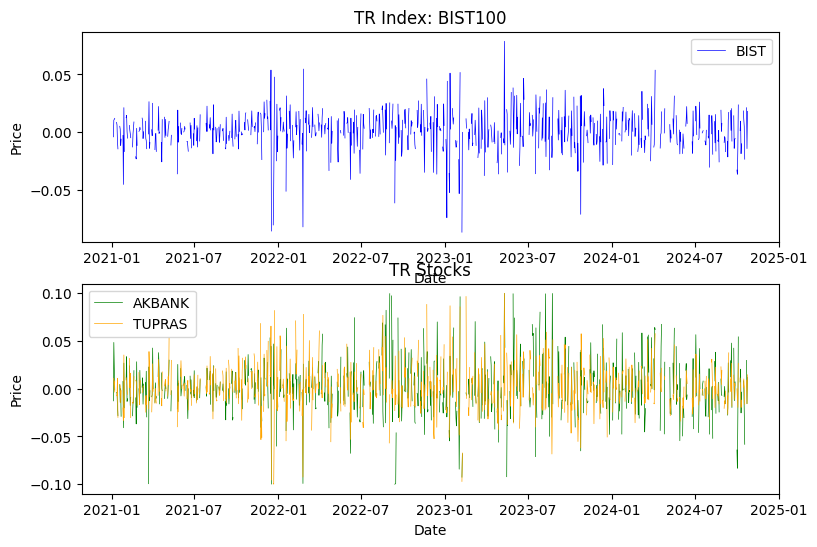

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(9,6)) 
ax[0].plot(daily_returns['XU100.IS'], label='BIST', linewidth=0.5, color='blue')
ax[0].set_title('TR Index: BIST100')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()

ax[1].plot(daily_returns[daily_returns.index>'2021-01-01']['AKBNK.IS'], label='AKBANK', linewidth=0.5, color='green')
ax[1].plot(daily_returns[daily_returns.index>'2021-01-01']['TUPRS.IS'], label='TUPRAS', linewidth=0.5, color='orange')
ax[1].set_title('TR Stocks')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[1].legend();

#
# Calculating the descriptive statistics:

In [44]:
# Creating a dictionary to store the statistics for each period
stats = {}

# Daily Returns Statistics
stats['Daily'] = {
    'US Stocks': daily_returns[['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'NVDA']].agg(['mean', 'std', 'skew', 'kurt']),
    'TR Stocks': daily_returns[['AKBNK.IS', 'TUPRS.IS']].agg(['mean', 'std', 'skew', 'kurt'])
}

# Weekly Returns Statistics
stats['Weekly'] = {
    'US Stocks': weekly_returns[['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'NVDA']].agg(['mean', 'std', 'skew', 'kurt']),
    'TR Stocks': weekly_returns[['AKBNK.IS', 'TUPRS.IS']].agg(['mean', 'std', 'skew', 'kurt'])
}

# Monthly Returns Statistics
stats['Monthly'] = {
    'US Stocks': monthly_returns[['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'NVDA']].agg(['mean', 'std', 'skew', 'kurt']),
    'TR Stocks': monthly_returns[['AKBNK.IS', 'TUPRS.IS']].agg(['mean', 'std', 'skew', 'kurt'])
}

# Yearly Returns Statistics
stats['Yearly'] = {
    'US Stocks': yearly_returns[['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'NVDA']].agg(['mean', 'std', 'skew', 'kurt']),
    'TR Stocks': yearly_returns[['AKBNK.IS', 'TUPRS.IS']].agg(['mean', 'std', 'skew', 'kurt'])
}

for period, data in stats.items():
    print(f"\n{period} Returns:")
    print()
    print("US Stocks:")
    print(data['US Stocks'])
    print("TR Stocks:")
    print(data['TR Stocks'])



Daily Returns:

US Stocks:
          AAPL      AMZN   BTC-USD     GOOGL      NVDA
mean  0.001198  0.000893  0.002194  0.001057  0.002347
std   0.018119  0.020990  0.037670  0.018376  0.031442
skew  0.198707  0.149894 -0.049978  0.079453  0.572386
kurt  5.168353  5.809903  7.247585  4.460747  5.457791
TR Stocks:
      AKBNK.IS  TUPRS.IS
mean  0.000843  0.001600
std   0.025500  0.022775
skew  0.192232 -0.028985
kurt  2.442999  2.744749

Weekly Returns:

US Stocks:
          AAPL      AMZN   BTC-USD     GOOGL      NVDA
mean  0.005970  0.004676  0.015638  0.004111  0.011925
std   0.038016  0.041942  0.102865  0.038367  0.064215
skew -0.161282  0.002611  0.162859  0.163401  0.228169
kurt  2.063109  1.481718  1.418031  0.969034  0.954310
TR Stocks:
      AKBNK.IS  TUPRS.IS
mean  0.007727  0.009408
std   0.065051  0.054660
skew  0.350591  0.483789
kurt  2.308819  2.838778

Monthly Returns:

US Stocks:
          AAPL      AMZN   BTC-USD     GOOGL      NVDA
mean  0.026228  0.020243  0.070714  

# -->  US stocks generally exhibit stable returns with moderate volatility, while **BTC** stands out with significantly higher risk and return. Turkish stocks show higher volatility compared to US stocks but offer attractive returns, especially over longer periods. The skewness and kurtosis values suggest the presence of occasional extreme returns, particularly for daily returns. As the time horizon increases (weekly to yearly), returns become more normalized, with volatility stabilizing.
#

#
# Plotting the histogram:

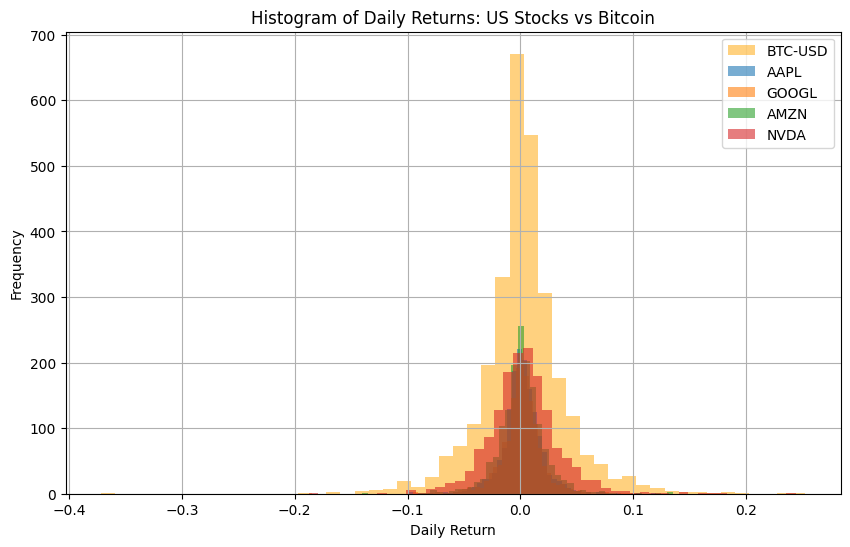

In [45]:
us_stocks = ['AAPL', 'GOOGL', 'AMZN', 'NVDA']
crypto = ['BTC-USD']

daily_returns_us = daily_returns[us_stocks]
daily_returns_crypto = daily_returns[crypto]

# Plot histograms of US stocks and Bitcoin
plt.figure(figsize=(10, 6))

# BTC in the background
plt.hist(daily_returns_crypto['BTC-USD'].dropna(), bins=50, alpha=0.5, label='BTC-USD', color='orange')

# US stocks on top of Bitcoin
for stock in us_stocks:
    plt.hist(daily_returns_us[stock].dropna(), bins=50, alpha=0.6, label=stock)

plt.title('Histogram of Daily Returns: US Stocks vs Bitcoin')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# --> Higher risk and return can easily be recognized on NVDA and BTC.
#


# Part B Question 1:

AAPL Monthly Returns - mean: 0.026227827359186547, standard deviation: 0.08318348241809151
BTC Monthly Returns - mean: 0.07071366843937733, standard deviation: 0.2308455490748582
Correlation between AAPL and BTC Monthly is : 0.2722494882795494


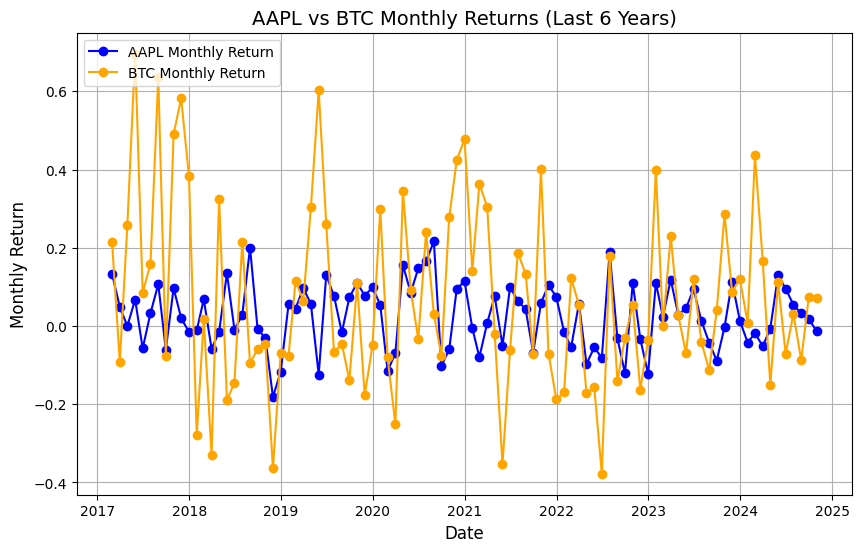

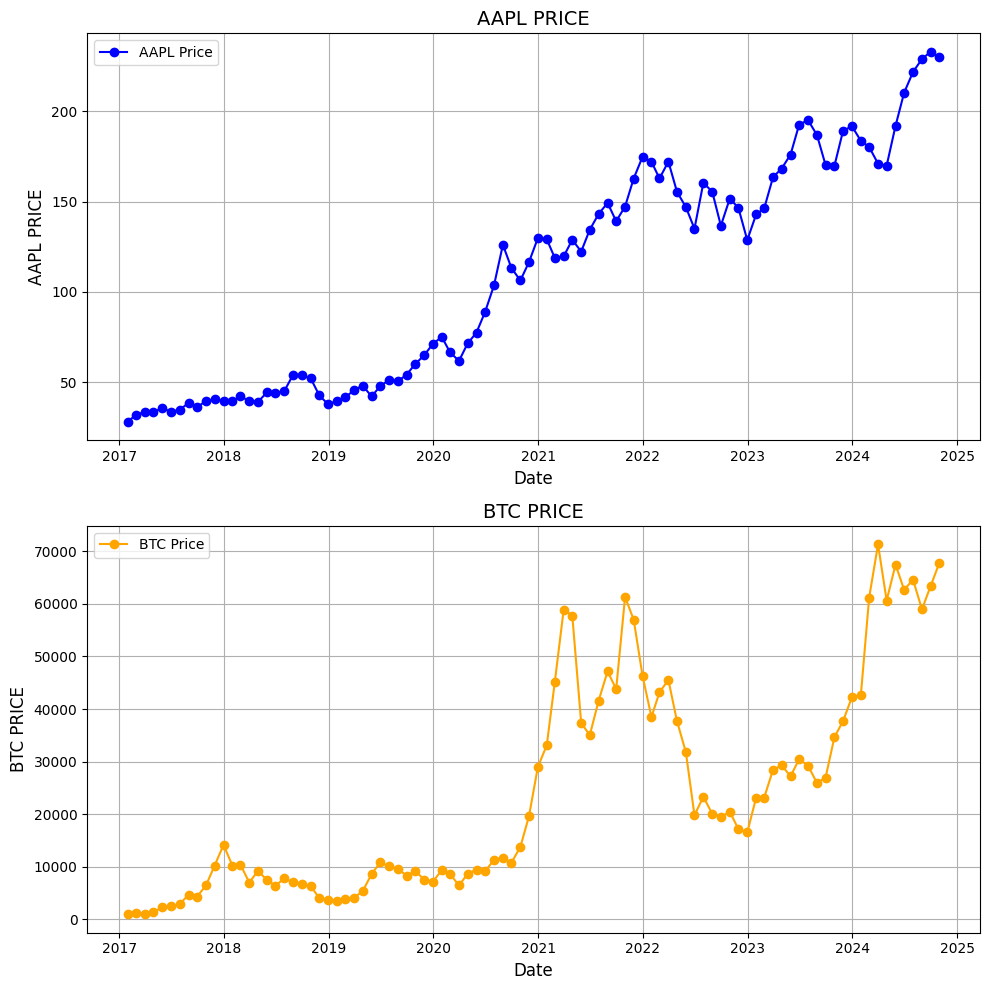

In [46]:
combined_data = pd.DataFrame({
    'Monthly_Return_AAPL': monthly_returns['AAPL'], 
    'Monthly_Return_BTC': monthly_returns['BTC-USD'],
    'Adj Close_AAPL': monthly_data['AAPL'],
    'Adj Close_BTC': monthly_data['BTC-USD']
})

mean_aapl = combined_data['Monthly_Return_AAPL'].mean()
std_aapl = combined_data['Monthly_Return_AAPL'].std()

mean_btc = combined_data['Monthly_Return_BTC'].mean()
std_btc = combined_data['Monthly_Return_BTC'].std()

print("AAPL Monthly Returns - mean: {}, standard deviation: {}".format(mean_aapl, std_aapl))
print("BTC Monthly Returns - mean: {}, standard deviation: {}".format(mean_btc, std_btc))

correlation = combined_data['Monthly_Return_AAPL'].corr(combined_data['Monthly_Return_BTC'])
print("Correlation between AAPL and BTC Monthly is : {}".format(correlation))


plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Monthly_Return_AAPL'], label='AAPL Monthly Return', color='blue', linestyle='-', marker='o')
plt.plot(combined_data.index, combined_data['Monthly_Return_BTC'], label='BTC Monthly Return', color='orange', linestyle='-', marker='o')

plt.title('AAPL vs BTC Monthly Returns (Last 6 Years)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Return', fontsize=12)
plt.legend(loc='upper left')

plt.grid(True)
plt.show()


fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(combined_data.index, combined_data['Adj Close_AAPL'], label='AAPL Price', color='blue', linestyle='-', marker='o')
ax[0].set_title('AAPL PRICE', fontsize=14)
ax[0].set_xlabel('Date', fontsize=12)
ax[0].set_ylabel('AAPL PRICE', fontsize=12)
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(combined_data.index, combined_data['Adj Close_BTC'], label='BTC Price', color='orange', linestyle='-', marker='o')
ax[1].set_title('BTC PRICE', fontsize=14)
ax[1].set_xlabel('Date', fontsize=12)
ax[1].set_ylabel('BTC PRICE', fontsize=12)
ax[1].legend(loc='upper left')
ax[1].grid(True)

plt.tight_layout()
plt.show()


--> As for AAPL, monthly mean return is 2.59 % and the standard deviation is 8.60 %. As for BTC, monthly mean return is 4.33% whereas standard deviation is 20.50 %. It can be clearly seen that AAPL’s monthly returns are less volatile than BTC since BTC’s standard deviation is much higher. AAPL experiences fluctuations as well, but these are more stable compared to BTC. 
Correlation between AAPL and BTC is 0.2564, correlation is not very high but we can say that they tend to show similar trends. This can be explained with various reasons, first that comes to mind, put simply, during monetary expansions , asset prices usually rise. I also plot monthly returns and price graphs. As it can be seen, AAPL shows a more stable, upward trend with dips but fewer sharp drops compared to BTC. BTC's price graph shows more peaks and valleys, consistent with its higher volatility. In the return graph, we can see BTC's returns spiking higher and dipping lower more frequently than AAPL, this supports the BTC’s higher volatility . AAPL's returns remain closer to the mean, with fewer extreme deviations

# PART B Question 2:

Correlation Matrix of Monthly Returns for BTC, MSFT, JPM, GS, GOOGL:
          BTC-USD      MSFT       JPM        GS     GOOGL
BTC-USD  1.000000  0.305468  0.253691  0.280634  0.262973
MSFT     0.305468  1.000000  0.352073  0.399193  0.660319
JPM      0.253691  0.352073  1.000000  0.828986  0.412600
GS       0.280634  0.399193  0.828986  1.000000  0.512060
GOOGL    0.262973  0.660319  0.412600  0.512060  1.000000

Kurtosis and Skewness of Monthly Returns for BTC, MSFT, JPM, GS, GOOGL:
         Kurtosis  Skewness
BTC-USD  2.965699  0.535657
MSFT     2.778542  0.023203
JPM      3.906521 -0.182210
GS       3.146930  0.027459
GOOGL    2.753149 -0.257601


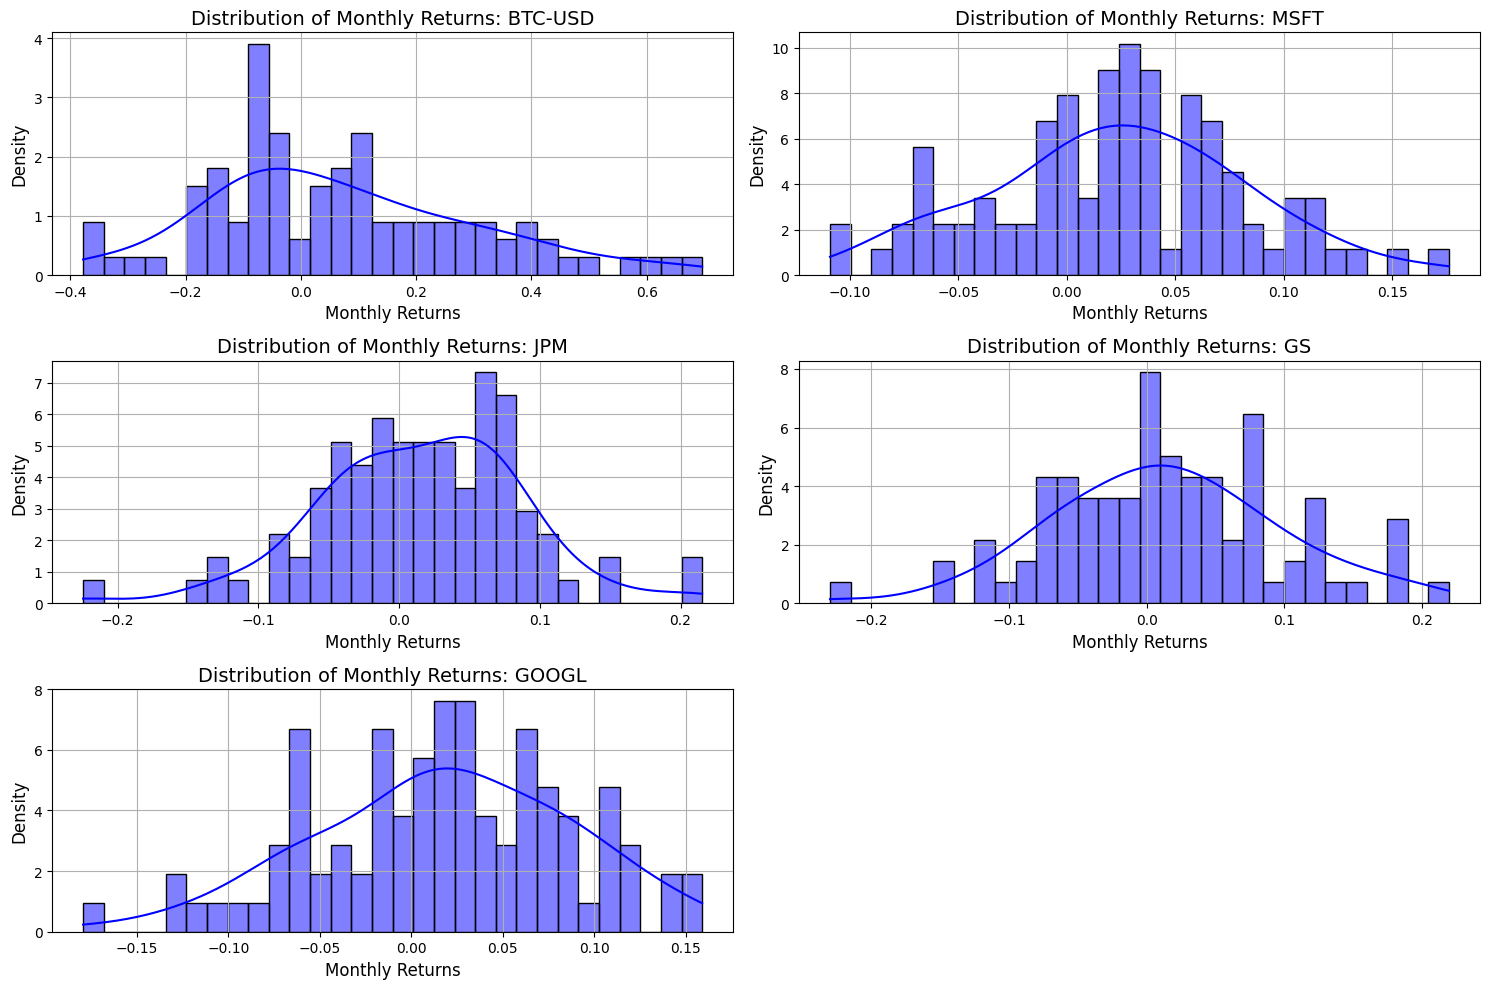

In [47]:


tickers_b2 = ['BTC-USD', 'MSFT', 'JPM', 'GS', 'GOOGL']

filtered_returns = monthly_returns[tickers_b2]

# Correlation matrix
correlation_matrix = filtered_returns.corr()

print("Correlation Matrix of Monthly Returns for BTC, MSFT, JPM, GS, GOOGL:")
print(correlation_matrix)

# Lambda expressions for kurtosis and skewness calculations
kurtosis_values = filtered_returns.apply(lambda x: kurtosis(x.dropna(), fisher=False))
skewness_values = filtered_returns.apply(lambda x: skew(x.dropna()))

stats_df = pd.DataFrame({
    'Kurtosis': kurtosis_values,
    'Skewness': skewness_values
})

print()
print("Kurtosis and Skewness of Monthly Returns for BTC, MSFT, JPM, GS, GOOGL:")
print(stats_df)


plt.figure(figsize=(15, 10))
n = len(tickers_b2)
rows = (n + 1) // 2 

for i, ticker in enumerate(tickers_b2):
    plt.subplot(rows, 2, i + 1) 
    sns.histplot(filtered_returns[ticker].dropna(), bins=30, kde=True, color='blue', stat='density')
    plt.title(f'Distribution of Monthly Returns: {ticker}', fontsize=14)
    plt.xlabel('Monthly Returns', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()


--> As can be seen, GS (Goldman Sachs) and JPM (JP Morgan) are highly correlated since they are both banks, same sector stocks tend to be highly correlated, since factors directly affecting their revenues are relevant to each other. Also, GOOGL and MSFT, since they are both tech companies, they are also correlated. As for BTC, it has relatively low correlation this suggests Bitcoin's price movements are largely independent from these traditional assets, reflecting its role as an alternative asset. As for other comments on notes for Risk Return Calculations, I prefer to choose skewness and kurtosis to comment on. As can be seen from the skewness and kurtosis table, JPMorgan stands out with higher kurtosis (3.81), this suggests a higher risk of extreme outcomes compared to the other assets. Since kurtosis > 3 means heavier tails , this implies more probability for extreme events. 


# PART B Question 3: Calculating both the simplified version and the real sharpe ratio. We use 5-Year US Treasury bond yield as Rf. We take the manuel input of the user for Turkish Rf as it depends highly on the investment horizon.

In [48]:

# Fetch 5-Year US Treasury bond yield data
treasury_5y = yf.Ticker("^FVX")
treasury_data = treasury_5y.history(period="1d")
us_risk_free_rate = treasury_data['Close'].iloc[-1] / 100  # Latest yield as a percentage

print(f"Latest 5-Year US Treasury Bond Yield (Risk-Free Rate for US Stocks): {us_risk_free_rate:.4f}")

# Ask the user for the Turkish risk-free rate
turkish_risk_free_rate = float(input("Enter the Turkish risk-free rate (e.g., 0.18 for 18%): "))

# Adjust the risk-free rate based on the frequency
def adjust_risk_free_rate(risk_free_rate, period):
    if period == 'Daily':
        return risk_free_rate / 365
    elif period == 'Weekly':
        return risk_free_rate / 52
    elif period == 'Monthly':
        return risk_free_rate / 12
    else:
        return risk_free_rate  # Annual risk-free rate remains the same

# Function to calculate Sharpe Ratio with optional risk-free rate
def calculate_sharpe_ratio(stats_df, risk_free_rate=0):
    mean_returns = stats_df.loc['mean']
    std_returns = stats_df.loc['std']
    sharpe_ratios = (mean_returns - risk_free_rate) / std_returns
    return sharpe_ratios

# Function to display Sharpe Ratios for a given data set (US or Turkish stocks)
def display_sharpe_ratios(stats, period_label, us_risk_free_rate, turkish_risk_free_rate):
    # Adjust the risk-free rates based on the period
    adjusted_us_rf = adjust_risk_free_rate(us_risk_free_rate, period_label)
    adjusted_tr_rf = adjust_risk_free_rate(turkish_risk_free_rate, period_label)

    # Calculate simplified and risk-free Sharpe Ratios for US and Turkish stocks
    sharpe_us_simplified = calculate_sharpe_ratio(stats['US Stocks'])
    sharpe_tr_simplified = calculate_sharpe_ratio(stats['TR Stocks'])

    sharpe_us_with_rf = calculate_sharpe_ratio(stats['US Stocks'], adjusted_us_rf)
    sharpe_tr_with_rf = calculate_sharpe_ratio(stats['TR Stocks'], adjusted_tr_rf)

    # Print results for US and Turkish stocks
    print(f"\n{period_label} Sharpe Ratios (US Stocks + BTC, Simplified):")
    print(sharpe_us_simplified)
    print(f"\n{period_label} Sharpe Ratios (Turkish Stocks, Simplified):")
    print(sharpe_tr_simplified)

    print(f"\n{period_label} Sharpe Ratios (US Stocks + BTC, with US Risk-Free Rate):")
    print(sharpe_us_with_rf)
    print(f"\n{period_label} Sharpe Ratios (Turkish Stocks, with Turkish Risk-Free Rate):")
    print(sharpe_tr_with_rf)

# Use the organized stats dictionary
for period, data in stats.items():
    display_sharpe_ratios(data, period, us_risk_free_rate, turkish_risk_free_rate)


Latest 5-Year US Treasury Bond Yield (Risk-Free Rate for US Stocks): 0.0400

Daily Sharpe Ratios (US Stocks + BTC, Simplified):
AAPL       0.066096
AMZN       0.042566
BTC-USD    0.058241
GOOGL      0.057505
NVDA       0.074648
dtype: float64

Daily Sharpe Ratios (Turkish Stocks, Simplified):
AKBNK.IS    0.033047
TUPRS.IS    0.070274
dtype: float64

Daily Sharpe Ratios (US Stocks + BTC, with US Risk-Free Rate):
AAPL       0.060044
AMZN       0.037343
BTC-USD    0.055330
GOOGL      0.051538
NVDA       0.071161
dtype: float64

Daily Sharpe Ratios (Turkish Stocks, with Turkish Risk-Free Rate):
AKBNK.IS   -0.004558
TUPRS.IS    0.028171
dtype: float64

Weekly Sharpe Ratios (US Stocks + BTC, Simplified):
AAPL       0.157047
AMZN       0.111486
BTC-USD    0.152024
GOOGL      0.107148
NVDA       0.185697
dtype: float64

Weekly Sharpe Ratios (Turkish Stocks, Simplified):
AKBNK.IS    0.118780
TUPRS.IS    0.172124
dtype: float64

Weekly Sharpe Ratios (US Stocks + BTC, with US Risk-Free Rate):
AAP

--> The results indicate that Nvidia consistently demonstrates the highest Sharpe Ratios across all time frames among US stocks, reflecting strong risk-adjusted returns. Amazon and Google also maintain robust Sharpe Ratios, while Bitcoin offers decent returns with relatively high volatility. For Turkish stocks, Tüpraş outperforms Akbank in terms of risk-adjusted returns, particularly in shorter time frames. However, their performance diminishes significantly when the Turkish risk-free rate is considered, especially over longer periods. Overall, US stocks present better risk-adjusted returns compared to Turkish stocks, with risk-adjusted performance improving as the time horizon increases.

#  

#
# PART B Question 4:


Daily Returns Analysis:
     Portfolio  Expected Return  Standard Deviation  Number of Stocks
0  Portfolio 1         0.002194            0.037670                 1
1  Portfolio 2         0.001696            0.022708                 2
2  Portfolio 3         0.001483            0.018678                 3
3  Portfolio 4         0.001335            0.017420                 4


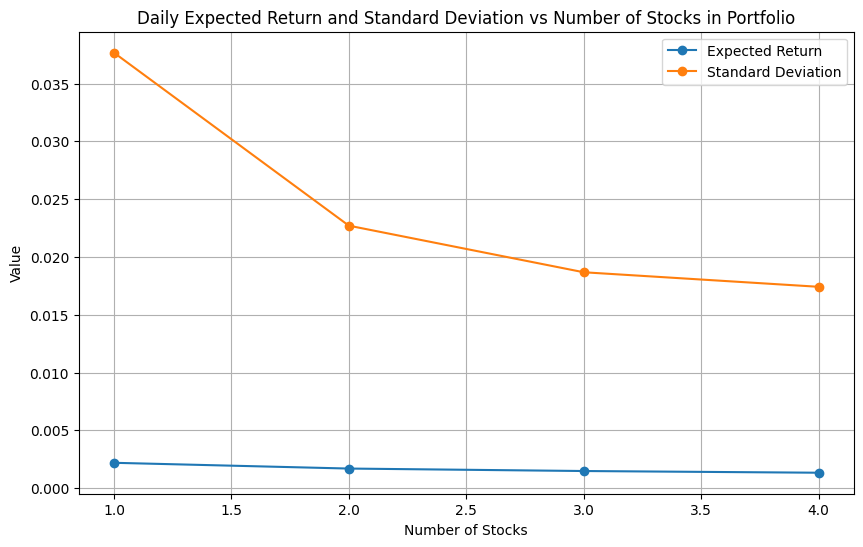


Weekly Returns Analysis:
     Portfolio  Expected Return  Standard Deviation  Number of Stocks
0  Portfolio 1         0.015638            0.102865                 1
1  Portfolio 2         0.010804            0.057017                 2
2  Portfolio 3         0.008573            0.043911                 3
3  Portfolio 4         0.007599            0.038734                 4


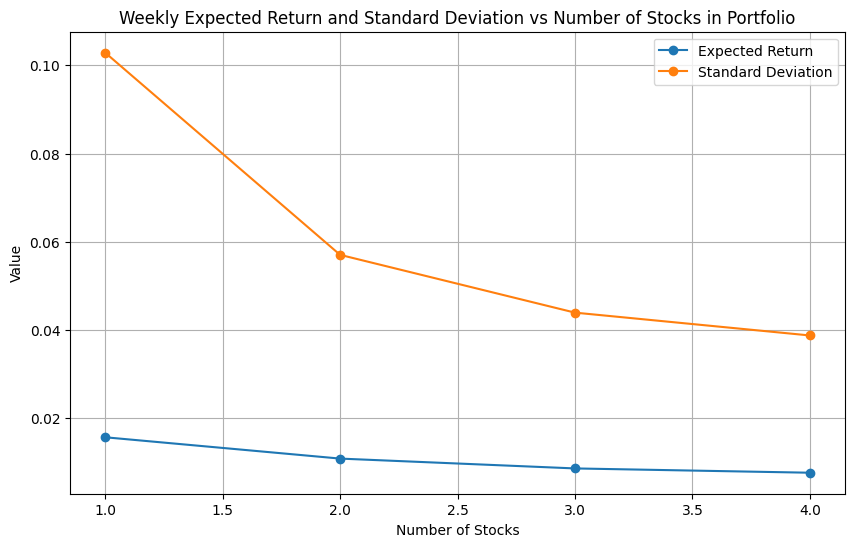


Monthly Returns Analysis:
     Portfolio  Expected Return  Standard Deviation  Number of Stocks
0  Portfolio 1         0.070714            0.230846                 1
1  Portfolio 2         0.048471            0.132914                 2
2  Portfolio 3         0.038101            0.099837                 3
3  Portfolio 4         0.033636            0.088973                 4


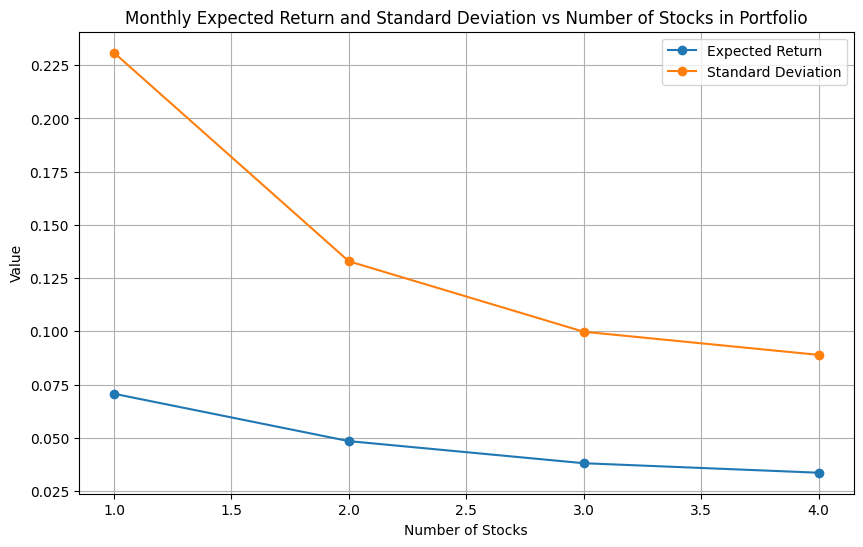

In [49]:
# PART B QUESTION 4
# Define the assets
assets = ['BTC-USD', 'AAPL', 'GOOGL', 'AMZN']

# Create a dictionary to store data for each resampling frequency
resampled_returns = {
    'Daily': daily_returns[assets],
    'Weekly': weekly_returns[assets],
    'Monthly': monthly_returns[assets]
}

# Portfolio weights for each case
portfolios = {
    'Portfolio 1': [1, 0, 0, 0],  # 100% BTC
    'Portfolio 2': [0.5, 0.5, 0, 0],  # 50% BTC, 50% AAPL
    'Portfolio 3': [1/3, 1/3, 1/3, 0],  # 1/3 BTC, 1/3 AAPL, 1/3 GOOGL
    'Portfolio 4': [0.25, 0.25, 0.25, 0.25]  # 25% each in BTC, AAPL, GOOGL, AMZN
}

# Define a function to calculate expected return and standard deviation for a portfolio
def calculate_portfolio_stats(returns, portfolios):
    results = []
    expected_returns = returns.mean()
    cov_matrix = returns.cov()

    for name, weights in portfolios.items():
        weights = np.array(weights)
        
        # Expected return of portfolio
        portfolio_return = np.dot(weights, expected_returns)
        
        # Portfolio variance and standard deviation
        portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
        portfolio_std = np.sqrt(portfolio_variance)
        
        results.append({
            'Portfolio': name,
            'Expected Return': portfolio_return,
            'Standard Deviation': portfolio_std,
            'Number of Stocks': np.count_nonzero(weights)
        })
    
    return pd.DataFrame(results)

# Loop through the resampled data (daily, weekly, monthly, yearly)
for frequency, returns in resampled_returns.items():
    print(f"\n{frequency} Returns Analysis:")
    
    # Calculate portfolio statistics
    df_results = calculate_portfolio_stats(returns, portfolios)
    
    # Print the results
    print(df_results)
    
    # Plot Expected Return vs Number of Stocks
    plt.figure(figsize=(10, 6))
    plt.plot(df_results['Number of Stocks'], df_results['Expected Return'], marker='o', label='Expected Return')
    plt.plot(df_results['Number of Stocks'], df_results['Standard Deviation'], marker='o', label='Standard Deviation')
    plt.title(f'{frequency} Expected Return and Standard Deviation vs Number of Stocks in Portfolio')
    plt.xlabel('Number of Stocks')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


c. **Standard Deviation Observation:**  
As the number of stocks in the portfolio increases, the standard deviation consistently decreases, indicating reduced portfolio risk through diversification.

d. **Expected Results with More Stocks:**  
Adding more stocks will likely continue reducing the standard deviation, but the rate of risk reduction will slow down as diversification has diminishing returns beyond a certain point.

e. **"Don't Put All of Your Eggs into One Basket" Generalization:**  
This exercise shows that diversifying (spreading investments across multiple assets) reduces overall risk, supporting the idea that spreading your investments lowers the impact of individual stock 

#
# PART B Question 5, 6, 7, 8:

In [50]:
# Define US stocks
y_apple = monthly_returns['AAPL']
y_amazon = monthly_returns['AMZN']
y_google = monthly_returns['GOOGL']
y_nvidia = monthly_returns['NVDA']
y_us = [y_apple, y_amazon, y_google, y_nvidia]

# Define Turkish stocks
y_tupras = monthly_returns['TUPRS.IS'][monthly_returns.index > '2021-01-01']  # for Turkish stocks
y_akbank = monthly_returns['AKBNK.IS'][monthly_returns.index > '2021-01-01']  # for Turkish stocks
y_tr = [y_tupras, y_akbank]

# Define market indices
x_bist = monthly_returns['XU100.IS'][monthly_returns.index > '2021-01-01']  # for Turkish stocks
x_bist = sm.add_constant(x_bist)

x_nasdaq = monthly_returns['^IXIC']  # for US stocks
x_nasdaq = sm.add_constant(x_nasdaq)

# OLS for US stocks
print("US Stocks: Betas, t-test, and R-squared values")
for y in y_us:
    # Align the indices between the stock and NASDAQ data
    aligned_x_nasdaq = x_nasdaq.loc[y.index].dropna()
    aligned_y = y.loc[aligned_x_nasdaq.index].dropna()
    
    # Remove rows with NaN or infinite values from both dependent and independent variables
    mask = np.isfinite(aligned_x_nasdaq).all(axis=1) & np.isfinite(aligned_y)
    aligned_x_nasdaq = aligned_x_nasdaq[mask]
    aligned_y = aligned_y[mask]

    # Fit the OLS model
    model = sm.OLS(aligned_y, aligned_x_nasdaq)
    results = model.fit()
    
    # Extract the beta, t-value, p-value, and R-squared
    beta = results.params['^IXIC']
    t_value = results.tvalues['^IXIC']
    p_value = results.pvalues['^IXIC']
    r_squared = results.rsquared

    # Print the results
    print(f"\n{y.name} vs NASDAQ (^IXIC):")
    print(f"Beta: {beta}")
    print(f"T-value: {t_value}")
    print(f"P-value: {p_value}")
    print(f"R-squared: {r_squared}")
    print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")

# OLS for Turkish stocks
print("\nTurkish Stocks: Betas, t-test, and R-squared values")
for y in y_tr:
    # Align the indices between the stock and BIST 100 data
    aligned_x_bist = x_bist.loc[y.index].dropna()
    aligned_y = y.loc[aligned_x_bist.index].dropna()
    
    # Remove rows with NaN or infinite values from both dependent and independent variables
    mask = np.isfinite(aligned_x_bist).all(axis=1) & np.isfinite(aligned_y)
    aligned_x_bist = aligned_x_bist[mask]
    aligned_y = aligned_y[mask]

    # Fit the OLS model
    model = sm.OLS(aligned_y, aligned_x_bist)
    results = model.fit()
    
    # Beta, t-value, p-value, and R-squared
    beta = results.params['XU100.IS']
    t_value = results.tvalues['XU100.IS']
    p_value = results.pvalues['XU100.IS']
    r_squared = results.rsquared

    # Print the results
    print(f"\n{y.name} vs BIST 100 (XU100.IS):")
    print(f"Beta: {beta}")
    print(f"T-value: {t_value}")
    print(f"P-value: {p_value}")
    print(f"R-squared: {r_squared}")
    print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")


US Stocks: Betas, t-test, and R-squared values

AAPL vs NASDAQ (^IXIC):
Beta: 1.154275858304892
T-value: 11.416084062456324
P-value: 2.953545925260346e-19
R-squared: 0.5888436108251589
Significant: Yes

AMZN vs NASDAQ (^IXIC):
Beta: 1.2781938226864147
T-value: 12.28580556739355
P-value: 4.994661813219403e-21
R-squared: 0.6238752709779001
Significant: Yes

GOOGL vs NASDAQ (^IXIC):
Beta: 0.9437293758316955
T-value: 10.723729031968611
P-value: 7.939121563011028e-18
R-squared: 0.5582489196617737
Significant: Yes

NVDA vs NASDAQ (^IXIC):
Beta: 1.8424878279347428
T-value: 9.747111491213248
P-value: 8.622552740714252e-16
R-squared: 0.510768949639129
Significant: Yes

Turkish Stocks: Betas, t-test, and R-squared values

TUPRS.IS vs BIST 100 (XU100.IS):
Beta: 0.9502064821307161
T-value: 6.523552878998134
P-value: 6.32632565559034e-08
R-squared: 0.49740956806151004
Significant: Yes

AKBNK.IS vs BIST 100 (XU100.IS):
Beta: 1.1152560691759157
T-value: 8.28169606988072
P-value: 1.898573785945919e-10


**7. Comparing US and Turkish Betas:**
- **US vs Turkey:** In the US, stocks like NVDA have higher betas compared to Turkish stocks, indicating more sensitivity to market movements in the US.
- **Highest Beta:** NVDA has the highest beta (1.85), meaning it's more volatile compared to both other US and Turkish stocks.
- **Stocks to Buy in a US Economic Downturn:** If you expect a sharp drop in the US economy, you would avoid high-beta stocks like NVDA and AMZN, as they are more volatile. Instead, you might consider lower beta stocks like GOOGL, which has a lower sensitivity to market downturns.

**8. Statistical t-test and R-squared (Model Fit):**
- **T-test Significance:** The very low p-values (e.g., for AAPL, p = 2.77e-19) across all stocks indicate that the betas are statistically significant. This suggests strong evidence that the betas are different from zero, meaning these stocks' returns are strongly correlated with the market.
- **Model Fit (R-squared):** The R-squared values (e.g., AAPL: 0.589) suggest a moderately good fit, meaning that a significant portion of the stock's return variability is explained by the market index. However, it's not perfect, indicating other factors also influence stock returns.

#
# Markowitz Model (Personal Interest) 


Daily Returns Efficient Frontier:
Efficient Frontier for 2-Asset Portfolio (Daily Returns)


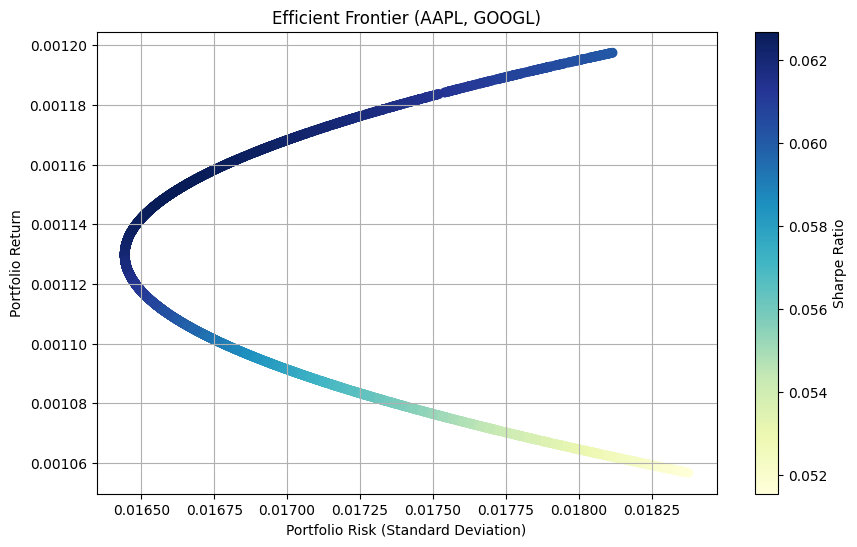

Efficient Frontier for 3-Asset Portfolio (Daily Returns)



Weekly Returns Efficient Frontier:
Efficient Frontier for 2-Asset Portfolio (Weekly Returns)


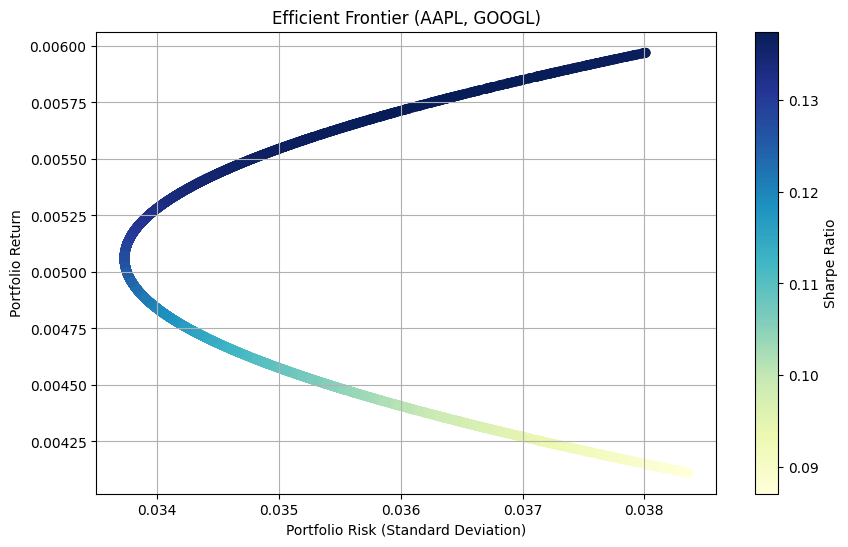

Efficient Frontier for 3-Asset Portfolio (Weekly Returns)



Monthly Returns Efficient Frontier:
Efficient Frontier for 2-Asset Portfolio (Monthly Returns)


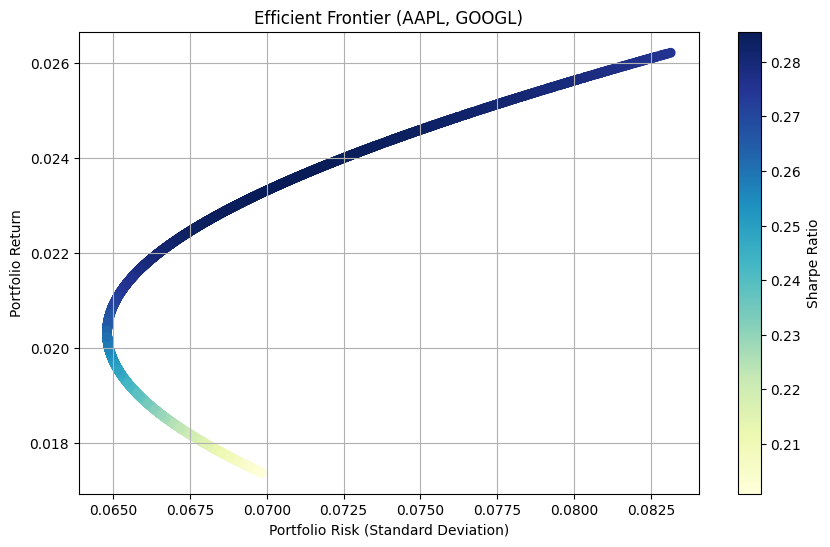

Efficient Frontier for 3-Asset Portfolio (Monthly Returns)


In [51]:
# Portfolio Performance Calculation Function
def portfolio_performance(weights, returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std = np.sqrt(portfolio_variance)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

# Generate Random Portfolios for Efficient Frontier
def generate_efficient_frontier(returns, cov_matrix, risk_free_rate, num_portfolios=5000):
    num_assets = len(returns)
    results = np.zeros((3, num_portfolios))
    weights_record = []
    
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

        portfolio_return, portfolio_std, sharpe_ratio = portfolio_performance(weights, returns, cov_matrix, risk_free_rate)
        results[0, i] = portfolio_return
        results[1, i] = portfolio_std
        results[2, i] = sharpe_ratio
        weights_record.append(weights)
    
    return results, weights_record

# Plot Efficient Frontier for 2-Asset Portfolio (2D)
def plot_efficient_frontier_2d(returns, cov_matrix, risk_free_rate, asset_names):
    results, weights_record = generate_efficient_frontier(returns, cov_matrix, risk_free_rate)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
    plt.title(f'Efficient Frontier ({", ".join(asset_names)})')
    plt.xlabel('Portfolio Risk (Standard Deviation)')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.grid(True)
    plt.show()

# Plot Interactive 3D Efficient Frontier for 3-Asset Portfolio (using Plotly)
def plot_efficient_frontier_3d_interactive(returns, cov_matrix, risk_free_rate, asset_names):
    results, weights_record = generate_efficient_frontier(returns, cov_matrix, risk_free_rate)

    fig = go.Figure(data=[
        go.Scatter3d(
            x=results[1,:],  # Standard deviation (Risk)
            y=results[0,:],  # Return
            z=results[2,:],  # Sharpe Ratio
            mode='markers',
            marker=dict(
                size=5,
                color=results[2,:],  # Color by Sharpe Ratio
                colorscale='YlGnBu',
                opacity=0.8,
                colorbar=dict(title='Sharpe Ratio')
            ),
            text=[f'Weights: {dict(zip(asset_names, weights))}' for weights in weights_record]  # Display asset weights
        )
    ])

    # Update layout for better appearance
    fig.update_layout(
        title=f'Efficient Frontier (3 Assets: {", ".join(asset_names)})',
        scene=dict(
            xaxis_title='Risk (Standard Deviation)',
            yaxis_title='Return',
            zaxis_title='Sharpe Ratio'
        ),
        width=800,
        height=600
    )

    fig.show()

# Example for Daily, Weekly, and Monthly Returns
resampled_returns = {
    'Daily': (daily_returns, us_risk_free_rate / 365),
    'Weekly': (weekly_returns, us_risk_free_rate / 52),
    'Monthly': (monthly_returns, us_risk_free_rate / 12)
}

for period, (returns, risk_free_rate_period) in resampled_returns.items():
    print(f"\n{period} Returns Efficient Frontier:")

    # Efficient Frontier for 2-Asset Portfolio
    returns_2 = returns[['AAPL', 'GOOGL']].mean()
    cov_matrix_2 = returns[['AAPL', 'GOOGL']].cov()
    print(f"Efficient Frontier for 2-Asset Portfolio ({period} Returns)")
    plot_efficient_frontier_2d(returns_2, cov_matrix_2, risk_free_rate_period, ['AAPL', 'GOOGL'])

    # Efficient Frontier for 3-Asset Portfolio (Interactive 3D)
    returns_3 = returns[['AAPL', 'GOOGL', 'AMZN']].mean()
    cov_matrix_3 = returns[['AAPL', 'GOOGL', 'AMZN']].cov()
    print(f"Efficient Frontier for 3-Asset Portfolio ({period} Returns)")
    plot_efficient_frontier_3d_interactive(returns_3, cov_matrix_3, risk_free_rate_period, ['AAPL', 'GOOGL', 'AMZN'])
